## Гистограмма выборки на примере экспоненциального распределения
Про данное распределение можно почитать по ссылке: https://goo.su/31Yl

In [1]:
import math
from scipy import stats as sts
import numpy as np
from matplotlib import pylab as plt

# генерируем выборку объемом 1000 из экспоненциального распределения
rv = sts.expon() 
sample = rv.rvs(1000)

# теоретическая плотность вероятности для распределения
x = np.linspace(0,15,1000)
# pdf - probability density function
pdf = rv.pdf(x)

Text(0, 0.5, '$f(x)$')

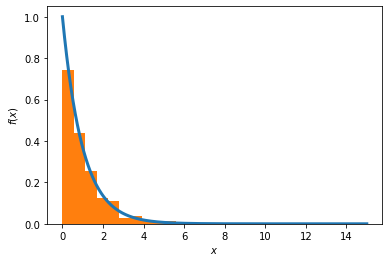

In [2]:
# Сторим гистограммы выборки и сравним с теоретической оценкой плотности 
# вероятности для экспоненциального распределения
plt.plot(x, pdf, linewidth = 3)
plt.hist(sample, density=True) # density - аналог normed в Python 3.3.1 
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

Вывод: гистограмма выборки приближает значение теоретической оценки плотности вероятности рассматриваемого распределения

## Распределение выборочных средних

Для начала опишем функции, которая генерирует грфик гистограммы выборочных средних случайной величины и теоретической оценки плотности вероятности для распределения выборочных средних для объема выборки n

In [3]:
def generate_pdf(n):
    means = []
    for i in range(1000):
        sample = rv.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    # Рассчет PDF для нормального распределения
    mu = 1 # pdf expectation
    sigma = (1./n) ** 0.5 # pdf sigma
    norm_rv = sts.norm(loc=mu, scale=sigma) 
    x = np.linspace(0,4,100) 
    pdf = norm_rv.pdf(x)
    # построим гистограмму выборочных средних и сопоставим с PDF для нормального распределения
    plt.plot(x, pdf, linewidth = 3) # Можно изменить ширину, чтобы график начинался от 0, но для сравнения лучше такой вид
    plt.hist(means, density=True) # density - аналог normed в Python 3.3.1 
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

Построим гистограммы распределений выборочных средних и приближающих их норм распределений с различными объемами выборок

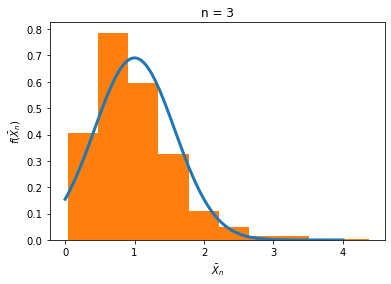

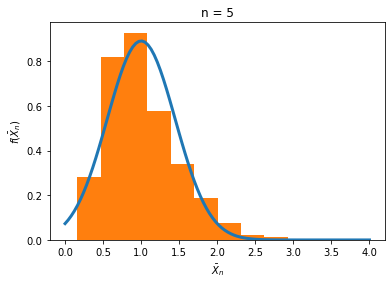

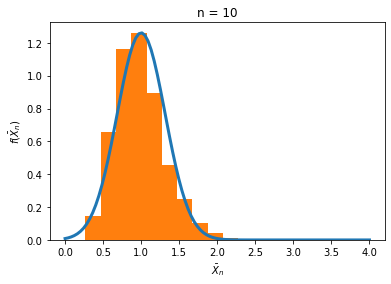

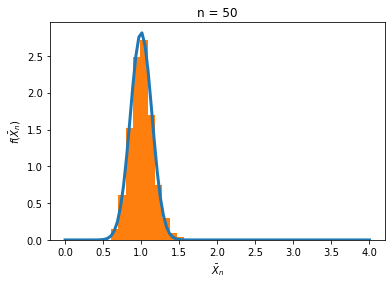

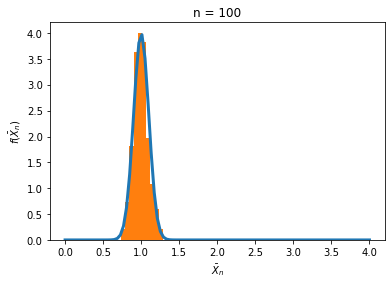

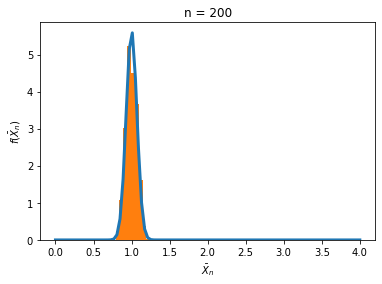

In [4]:
for n in [3, 5, 10, 50, 100, 200]:
    generate_pdf(n) # вызываем функцию для разлличных значений выборки

Вывод: графики показывают, что при увеличении объема выборки улучшается распределение выборочных средних соответствует приближающему нормальному распределению. При n=3 распределение несимметрично и не похоже на нормальное. Далее, при значении 50 распределение соответствует нормальному. Также с ростом числа уменьшается значение дисперсии распределения выборочных средних.